In [1]:
import altair as alt
import pandas as pd

alt.renderers.enable('notebook')
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [2]:
rankings_file_path = "../../data/Daily_Ranking.csv"
output_folder_path = "output_song_data"

In [6]:
particular_song_name = "Good Old Days (feat. Kesha)"

In [ ]:
df = pd.read_csv(rankings_file_path);

In [9]:
song_d = df[df["Track Name"] == particular_song_name]
# song_d = song_d[song_d["Position"] < 50]
song_d["Inv_Pos"] = 200 - song_d["Position"]
new_song_d = song_d.drop(columns=['Track Name', 'Artist', 'URL'])
new_song_d.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Position,Streams,Date,Region,Inv_Pos
126486,113,35972,2017-09-22,fr,87
126767,194,23122,2017-09-23,fr,6
126956,183,19756,2017-09-24,fr,17
127147,174,21529,2017-09-25,fr,26
127327,154,23498,2017-09-26,fr,46


In [10]:
df_countries = pd.read_json("countries.json")
df_countries = df_countries.transpose()
df_countries = df_countries.drop(columns=['continent', 'capital', 'languages', 'native', 'phone'])
df_countries = df_countries.rename(columns={'name':'country_name'})
df_countries.head()

,currency,country_name
AD,EUR,Andorra
AE,AED,United Arab Emirates
AF,AFN,Afghanistan
AG,XCD,Antigua and Barbuda
AI,XCD,Anguilla


In [11]:
new_song_d['Region'] = new_song_d['Region'].str.upper()
song_d_countries = new_song_d.merge(df_countries, how='inner', left_on='Region', right_index=True)
song_d_countries.head()

,Position,Streams,Date,Region,Inv_Pos,currency,country_name
126486,113,35972,2017-09-22,FR,87,EUR,France
126767,194,23122,2017-09-23,FR,6,EUR,France
126956,183,19756,2017-09-24,FR,17,EUR,France
127147,174,21529,2017-09-25,FR,26,EUR,France
127327,154,23498,2017-09-26,FR,46,EUR,France


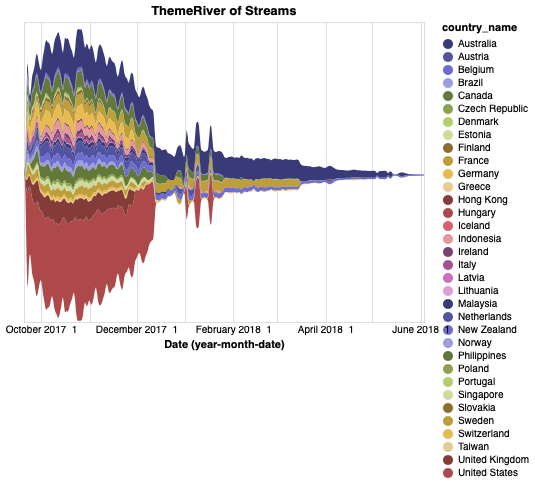

In [14]:
source = song_d_countries

alt.Chart(source).mark_area(interpolate='basis').encode(
    alt.X('yearmonthdate(Date):T',
        axis=alt.Axis(format='%B %Y %e', domain=False, tickSize=0)
    ),
    alt.Y('sum(Streams):Q', stack='center', axis=None),
    alt.Color('country_name:N',
        scale=alt.Scale(scheme='category20b')
    )
).properties(title='ThemeRiver of Streams').interactive()

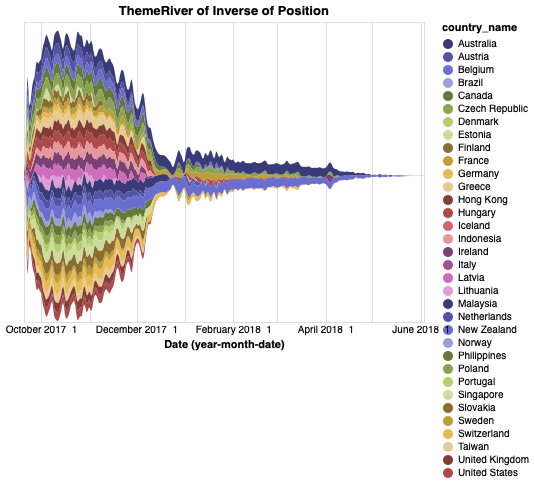

In [15]:
source = song_d_countries

alt.Chart(source).mark_area(interpolate='basis').encode(
    alt.X('yearmonthdate(Date):T',
        axis=alt.Axis(format='%B %Y %e', domain=False, tickSize=0)
    ),
    alt.Y('sum(Inv_Pos):Q', stack='center', axis=None),
    alt.Color('country_name:N',
        scale=alt.Scale(scheme='category20b')
    )
).properties(title='ThemeRiver of Inverse of Position').interactive()